In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

### Data Collection

In [2]:
# Grayscale help improve the accuracy on classification than RGB images
image_array = cv2.imread("Datasets/Photos/train/Open/_0.jpg", cv2.IMREAD_GRAYSCALE)

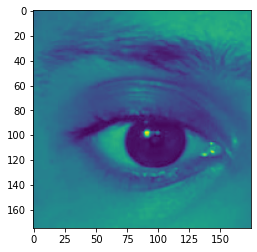

In [3]:
plt.imshow(image_array)

In [4]:
image_array.shape

(175, 175)

In [5]:
image_array

array([[ 70,  75,  80, ..., 128, 131, 131],
       [ 75,  79,  82, ..., 129, 131, 131],
       [ 78,  80,  82, ..., 130, 131, 130],
       ...,
       [104, 104, 105, ..., 106, 106, 106],
       [106, 105, 106, ..., 106, 106, 106],
       [107, 107, 107, ..., 106, 106, 106]], dtype=uint8)

In [6]:
# return the array for image
cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)

array([[[ 70,  70,  70],
        [ 75,  75,  75],
        [ 80,  80,  80],
        ...,
        [128, 128, 128],
        [131, 131, 131],
        [131, 131, 131]],

       [[ 75,  75,  75],
        [ 79,  79,  79],
        [ 82,  82,  82],
        ...,
        [129, 129, 129],
        [131, 131, 131],
        [131, 131, 131]],

       [[ 78,  78,  78],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [130, 130, 130],
        [131, 131, 131],
        [130, 130, 130]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       [[106, 106, 106],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       [[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]]

In [7]:
class_name = ['Closed','Open']
class_name.index('Closed')

0

In [8]:
# define filepath for training data
train_path = 'Datasets/Photos/train/'

# label classes
class_name = ['Closed','Open']
#(https://www.kaggle.com/chabdulrahman/eye-state-detection-drowsiness-detection)
# function to import and transform training data into arrays
training_data = []
def create_training_data():
    for classes in class_name:
        path = os.path.join(train_path,classes)   # file path
        index_class = class_name.index(classes)   # turn binary classes into 0 and 1 
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                backtorgb =cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (224,224))
                training_data.append([new_array,index_class])
            except Exception as e:
                pass
    
    

In [9]:
# call function
create_training_data()

In [10]:
print(training_data[0])

[array([[[ 64,  64,  64],
        [ 44,  44,  44],
        [ 56,  56,  56],
        ...,
        [199, 199, 199],
        [198, 198, 198],
        [196, 196, 196]],

       [[ 63,  63,  63],
        [ 43,  43,  43],
        [ 59,  59,  59],
        ...,
        [202, 202, 202],
        [201, 201, 201],
        [200, 200, 200]],

       [[ 60,  60,  60],
        [ 40,  40,  40],
        [ 62,  62,  62],
        ...,
        [202, 202, 202],
        [202, 202, 202],
        [201, 201, 201]],

       ...,

       [[152, 152, 152],
        [154, 154, 154],
        [152, 152, 152],
        ...,
        [179, 179, 179],
        [178, 178, 178],
        [177, 177, 177]],

       [[153, 153, 153],
        [157, 157, 157],
        [159, 159, 159],
        ...,
        [180, 180, 180],
        [180, 180, 180],
        [179, 179, 179]],

       [[153, 153, 153],
        [157, 157, 157],
        [161, 161, 161],
        ...,
        [181, 181, 181],
        [180, 180, 180],
        [179, 179, 179]

In [11]:
print(len(training_data))

1234


In [12]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)

In [13]:
# covert data to numpy array
X = np.array(X).reshape(-1,224,224,3)

In [14]:
X.shape

(1234, 224, 224, 3)

In [15]:
# train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify= y)
len(X_train),len(y_train),len(X_test),len(y_test)

(925, 925, 309, 309)

### Data Augmentation

In [16]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [17]:
# Instantiate imagedatagenerator
datagen = ImageDataGenerator(rescale= 1.0/255.0)
train_generator = datagen.flow(X_train,y_train,shuffle =False)
test_generator = datagen.flow(X_test,y_test,shuffle=False)

### CNN Modeling (eye Closed/Open)

In [18]:
# Construct CNN Model layers

model = Sequential()

model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])



In [19]:
history = model.fit(train_generator, validation_data=test_generator, epochs=25,shuffle=True)

Epoch 1/25
29/29 [==============================] - 120s 4s/step - loss: 0.9071 - accuracy: 0.6465 - val_loss: 0.4116 - val_accuracy: 0.8317
Epoch 2/25
29/29 [==============================] - 116s 4s/step - loss: 0.3517 - accuracy: 0.8724 - val_loss: 0.2766 - val_accuracy: 0.8997
Epoch 3/25
29/29 [==============================] - 113s 4s/step - loss: 0.2714 - accuracy: 0.8897 - val_loss: 0.2833 - val_accuracy: 0.8867
Epoch 4/25
29/29 [==============================] - 113s 4s/step - loss: 0.2372 - accuracy: 0.9168 - val_loss: 0.2153 - val_accuracy: 0.9256
Epoch 5/25
29/29 [==============================] - 114s 4s/step - loss: 0.1953 - accuracy: 0.9297 - val_loss: 0.1931 - val_accuracy: 0.9385
Epoch 6/25
29/29 [==============================] - 115s 4s/step - loss: 0.1743 - accuracy: 0.9330 - val_loss: 0.2319 - val_accuracy: 0.9061
Epoch 7/25
29/29 [==============================] - 114s 4s/step - loss: 0.2118 - accuracy: 0.9178 - val_loss: 0.2543 - val_accuracy: 0.9191
Epoch 8/25
29

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 373248)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                23887936  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

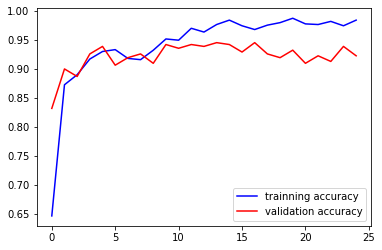

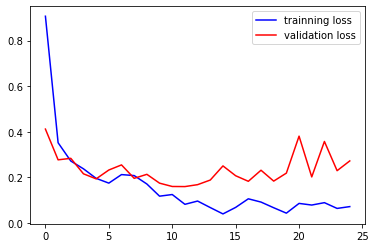

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [29]:
history.history['accuracy'][-1], history.history['val_accuracy'][-1]

(0.9837837815284729, 0.9223300814628601)

In [22]:
model.save('models/cnn_model_open.h5', overwrite=True)

### Predict test data

In [23]:
prediction = model.predict_classes(X_test)

/Users/jiachengxu/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report
import seaborn as sns

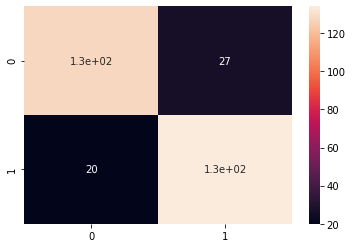

In [25]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True);

In [26]:
print(confusion_matrix(y_test,prediction))

[[128  27]
 [ 20 134]]


In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       155
           1       0.83      0.87      0.85       154

    accuracy                           0.85       309
   macro avg       0.85      0.85      0.85       309
weighted avg       0.85      0.85      0.85       309

